In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt 

In [2]:
def numpy_distance(x,y):
    return np.linalg.norm(x-y) # İki nokta arasındaki Öklid mesafesini hesaplar

In [3]:
data = pd.read_csv("Iris.csv")  # veri setinin yüklenmesi

In [4]:
X = data.to_numpy()  # X'i özellik veya giriş parametreleri olarak yapılması                     
X = X[:,1:5]

In [5]:
Y = data.to_numpy()  # Y'nin veri noktalarının veya özelliklerin çıktısını (etiketini) içerecek şekilde yapılması
Y = Y[:,5]

In [6]:
# Verilerin %80'i modeli eğitmek için kullanılacak şekilde bölmek ve Modları test etmek için %20 veri kullanılır
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2) 

In [7]:
accuracy = [] # Karşılık gelen K değerinin doğruluk değerlerini tutacak boş listedir
K = np.arange(1,35)  # K bir listedir [1,2,.....34] e kadar

In [8]:
for k in K:   # Her k değeri için modeli test ediyoruz
    prediction = []   # Her test durumunun tahmini bu listede saklanacak
    coorect_count = 0  # kaç tane doğru tahmin yapıldı
    for i in range(len(X_test)):  # test verilerindeki her nokta için tahmin yaparız
        distances = []
        for j in range(len(X_train)):
            dist = numpy_distance(X_test[i], X_train[j])
            # Eğitim noktasını, bu eğitim noktası ile arasındaki mesafeyi ekliyoruz 
            # Test noktası ve eğitim noktasıyla ilişkili etiket
            distances.append((X_train[j], dist, y_train[j]))  
        # Bu mesafe listesini trenler arasındaki mesafeye göre sıralıyoruz. Nokta ve test noktası olmak üzere
        # key=lambda x: x[1] burada x:x[1], bu listeyi kullanarak sıralayacağımızı belirtir
        # 2. (python indekslemede 0'dan başlar) sütun yani mesafe
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k] # k en yakın noktayı göz önünde bulundurarak
        class_counter = Counter() # Hangi etiketlerin kaç kez göründüğünü kontrol etmek için bir sayaç
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        prediction.append(class_counter.most_common(1)[0][0]) # Hangi en çok görünürse o etiketi tahmin ediyoruz
        if(y_test[i] == prediction[i]): 
            coorect_count = coorect_count + 1
    acc = coorect_count/float(len(X_test))  ## Kesinlik değeri
    accuracy.append(acc)

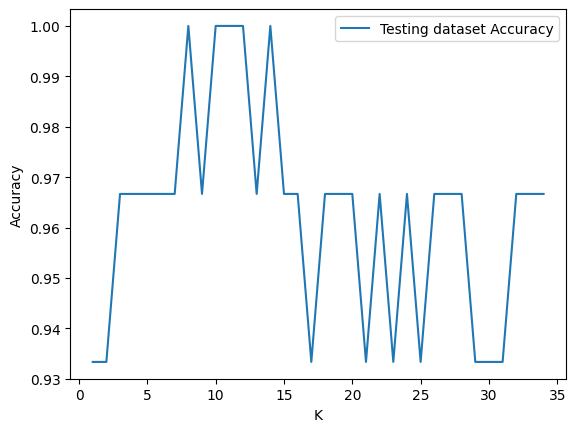

In [9]:
# Doğruluk grafiği ve K değeri
plt.plot(K, accuracy, label = 'Testing dataset Accuracy')
plt.legend() 
plt.xlabel('K') 
plt.ylabel('Accuracy') 
plt.show()